# Problem Statement:

'''
Coupled with the fact that the symptoms of Heart diseases cannot be detected until the condition becomes chronic, it is therefore challenging and scary for medical health experts to identify heart disease at its early stages. Many individuals could be suffering from the disease without their knowledge as they are not aware of the signs and symptoms of disease because it might be at an early stage.

Thus, a significant constraint found by health care workers is to predict heart diseases at an early stage, at minimal cost and at the same time provide a better health care system to treat the disease especially when there are robust machine learning algorithms and technologies that can be used in achieving this feat with a degree of accuracy and efficiency.
'''


# importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#loading the dataset from the local machine
HD_frame = pd.read_csv('heart.csv')


In [ ]:
#inspecting the sample dataset
HD_frame.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
5,58.0,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
6,58.0,1.0,0.0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0,0.0
7,55.0,1.0,0.0,160.0,289.0,0.0,0.0,145.0,1.0,0.8,1.0,1.0,3.0,0.0
8,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0,0.0
9,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0,0.0


In [ ]:
# data transformation (adding smoking column)
HD_frame['smoking'] = HD_frame['target']*1


In [ ]:
# to get a concise summary of the heart disease dataset
HD_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,smoking
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1002.000000,1002.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.498004,0.498004
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500246,0.500246
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [ ]:
#basic information about the dataset
HD_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   float64
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   float64
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1002 non-null   float64
 14  smoking   1002 non-null   float64
dtypes: float64(15)
memory usage: 121.1 KB


In [ ]:
#series in the dataset
HD_frame.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'smoking'],
      dtype='object')

In [ ]:
# size of the dataset
HD_frame.shape

(1032, 15)

In [ ]:
# checking for missing values
HD_frame['target']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1027    0.0
1028    0.0
1029    0.0
1030    0.0
1031    1.0
Name: target, Length: 1032, dtype: float64

In [ ]:
#checking for the missing value
HD_frame.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,smoking
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1028,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1029,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1030,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False


In [ ]:
# determine distinct values in target series
HD_frame['target'].value_counts()

0.0    503
1.0    499
Name: target, dtype: int64

In [ ]:
HD_frame.dropna(inplace = True)


In [ ]:
HD_frame['target'].head(20)


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    1.0
13    0.0
14    0.0
15    1.0
16    1.0
17    0.0
18    1.0
19    1.0
Name: target, dtype: float64

In [ ]:
HD_frame['target'].tail(20)


1002    0.0
1003    1.0
1004    1.0
1005    0.0
1006    1.0
1008    1.0
1009    0.0
1010    0.0
1011    1.0
1012    0.0
1013    0.0
1014    1.0
1015    0.0
1016    0.0
1017    0.0
1018    0.0
1019    1.0
1021    0.0
1022    0.0
1024    0.0
Name: target, dtype: float64

# Data Visualiztion

<AxesSubplot:>

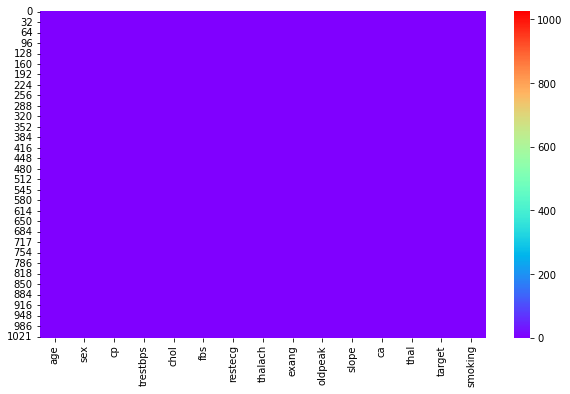

In [ ]:
#viewing missing value a plot
plt.figure(figsize=(10, 6))
sns.heatmap(HD_frame.isnull(),
            vmax =1025, cmap ='rainbow')

In [ ]:
# statistical summary of each series
for column in HD_frame.columns.values.tolist():
    print(column, '\n')
    print(HD_frame[column].value_counts())
    print(" ")

age 

58.0    65
57.0    57
54.0    52
59.0    45
52.0    42
51.0    38
56.0    38
62.0    37
60.0    37
44.0    35
64.0    32
67.0    31
63.0    31
61.0    31
55.0    30
41.0    29
65.0    26
66.0    25
43.0    25
53.0    25
45.0    24
42.0    24
46.0    23
48.0    22
50.0    20
47.0    18
49.0    17
35.0    15
39.0    14
70.0    14
38.0    11
68.0    11
40.0    11
69.0     9
71.0     8
37.0     6
34.0     6
29.0     4
77.0     3
76.0     2
74.0     2
Name: age, dtype: int64
 
sex 

1.0    698
0.0    297
Name: sex, dtype: int64
 
cp 

0.0    489
2.0    273
1.0    157
3.0     76
Name: cp, dtype: int64
 
trestbps 

130.0    122
120.0    120
140.0    104
110.0     61
150.0     55
138.0     42
128.0     38
125.0     35
160.0     34
112.0     29
132.0     28
118.0     24
124.0     20
108.0     20
135.0     19
145.0     17
134.0     17
152.0     17
170.0     15
100.0     14
122.0     13
126.0     10
136.0     10
180.0     10
142.0      9
105.0      9
115.0      8
146.0      8
148.0      7
1

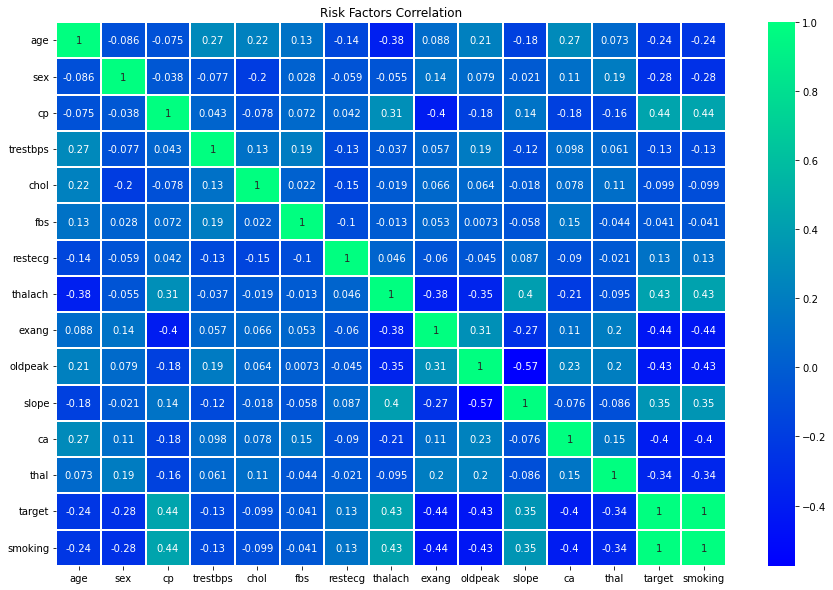

In [ ]:
#show the correlation between the risk factors
plt.figure(figsize=(15, 10))
sns.heatmap(HD_frame.corr(),linewidth=.01,annot=True,cmap="winter" )
plt.title('Risk Factors Correlation')
plt.show()
# plt.savefig('figure1.0.png')

number of male patients: 698
number of female patients: 297


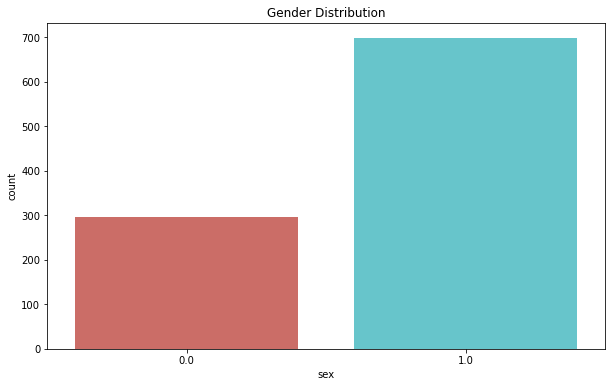

In [ ]:
# sex distribution
plt.figure(figsize=(10, 6))
sns.countplot(x = HD_frame['sex'],
              data = HD_frame, palette = 'hls')
plt.title('Gender Distribution')
male, female = HD_frame['sex'].value_counts()
print('number of male patients:', male)
print('number of female patients:', female)

In [ ]:
# sex distribution
HD_frame['sex'].value_counts()

1.0    698
0.0    297
Name: sex, dtype: int64

number of patients diagonised with heart disease: 499
number of patients diagonised without heart disease: 496


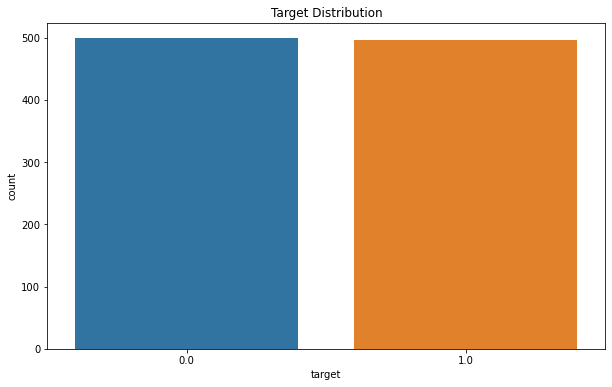

In [ ]:
# determine patient's  records
plt.figure(figsize=(10, 6))
HD_frame['target'].value_counts()
sns.countplot(x = HD_frame['target'],
              data = HD_frame)
plt.title('Target Distribution')

#
HD, NHD = HD_frame['target'].value_counts()
print('number of patients diagonised with heart disease:', HD)
print('number of patients diagonised without heart disease:', NHD)




In [ ]:
# total sample
HD_frame['target'].value_counts().sum()

995

In [ ]:
# get number of positive and negative patients
HD_frame['target'].value_counts()

0.0    499
1.0    496
Name: target, dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

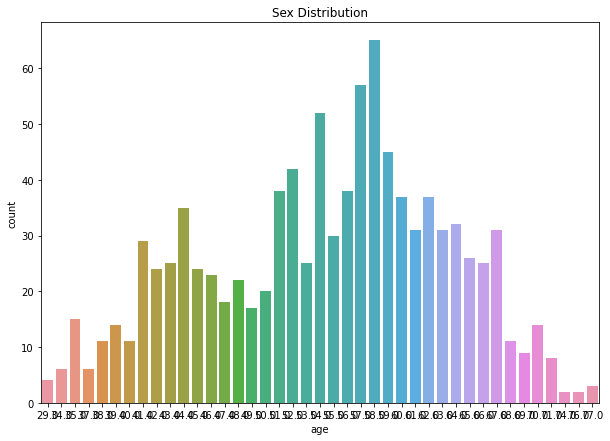

In [ ]:
# Age Distribution
plt.figure(figsize=(10,7))
sns.countplot(x = HD_frame['age'],
              data = HD_frame)
plt.title('Sex Distribution')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps', ylabel='count'>

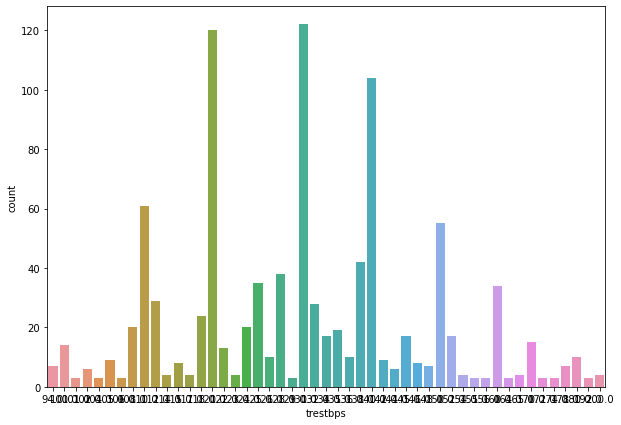

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(HD_frame['trestbps'])

<AxesSubplot:xlabel='cp', ylabel='thalach'>

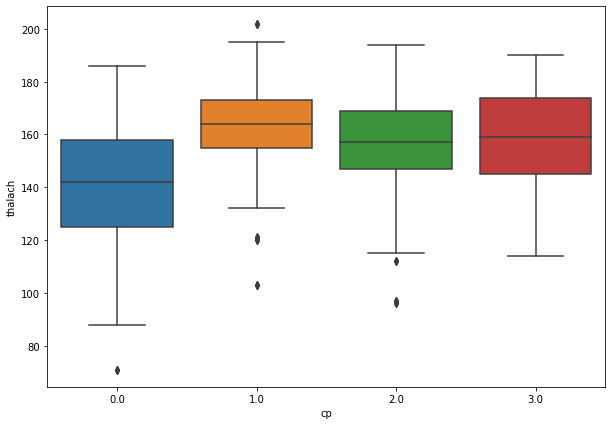

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = HD_frame['cp'],
            y = HD_frame['thalach'])

<Figure size 1080x2160 with 0 Axes>

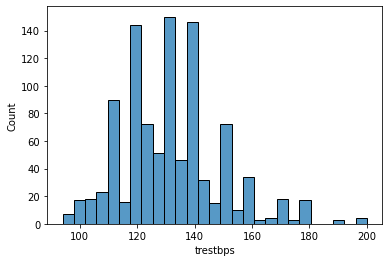

<Figure size 1080x2160 with 0 Axes>

In [ ]:
sns.histplot(HD_frame['trestbps'])
plt.figure(figsize=(15, 30))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol', ylabel='count'>

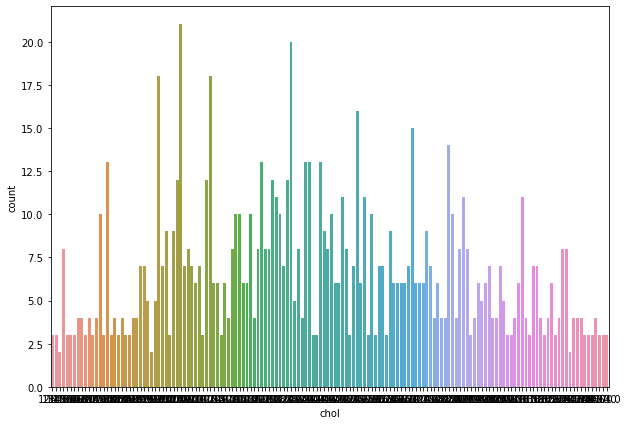

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(HD_frame['chol'],
              label = 'count')

Text(0.5, 1.0, 'Age vs Smoking Distribution')

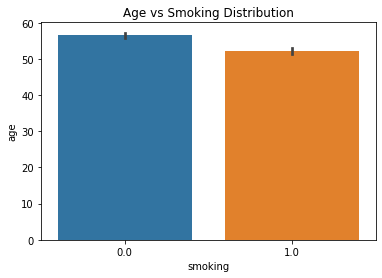

In [ ]:
#all smokers are liable to die young
sns.barplot(y =HD_frame['age'],
            x =HD_frame['smoking'])
#             color ='red')
plt.title('Age vs Smoking Distribution')

<AxesSubplot:xlabel='smoking', ylabel='age'>

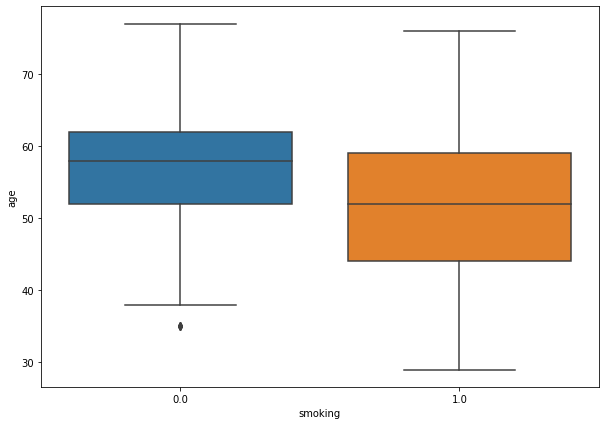

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(y =HD_frame['age'],
x =HD_frame['smoking'], data = HD_frame)
# orange, blue = HD_frame['age'].value_counts()/
# print('the ages of smokers with heart:', orange)
# print('the ages of smokers with heart:', blue)


In [ ]:
# Define a function to generate Gaussian noise
def gaussian_noise(HD_frame, std_dev):
    noise = np.random.normal(0, std_dev, HD_frame.shape)
    return noise

# Add Gaussian noise to the dataset
noisy_data = HD_frame + gaussian_noise(HD_frame, 20)

# Save the noisy dataset
np.save('noisy_data.np', noisy_data)
noisy_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,smoking
0,20.708678,-2.450477,2.132006,144.495407,200.342937,-23.464638,-1.345443,168.753757,-24.973579,46.729095,37.698467,-27.532337,-8.941190,9.008572,-6.888771
1,49.575977,9.308016,2.972533,156.932024,202.160738,10.110733,4.404977,179.495855,-10.119321,-14.931586,-24.067659,-16.569556,21.014198,-16.023184,34.218268
2,60.259444,24.358523,9.210075,133.583516,153.198094,8.952123,14.393204,113.348263,18.457649,19.488996,-1.988558,14.255547,15.751521,-4.725761,13.095190
3,46.997701,-29.755358,-30.065286,144.597025,169.214891,8.638045,-10.959506,170.653754,-2.976140,3.507827,-30.124048,26.943571,-12.333772,-1.324319,-17.091634
4,70.652527,-18.462860,12.348386,127.151712,282.591980,14.458853,34.109235,90.824147,-33.213637,34.383500,2.017087,-7.658157,-8.702064,-9.228582,31.688162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,54.437587,-17.036744,-3.072474,68.255350,138.460551,26.579920,-6.059454,164.885537,-1.625593,18.068930,36.580774,2.085196,9.574862,13.472656,19.011583
1019,24.984574,19.165787,12.971217,123.731356,218.214848,-47.875588,25.717341,133.893912,-8.674274,-31.508893,11.033972,-22.632274,31.287854,-13.601703,15.622376
1021,53.076083,-21.022170,6.324449,132.399207,218.297979,-17.790073,-6.939007,152.952496,16.081253,-5.506863,-10.660055,17.129876,-6.995139,-12.566369,39.762388
1022,48.406145,34.433150,-12.292348,111.634752,246.875344,11.831335,-13.566671,99.300619,18.286879,-29.906514,21.458114,4.540415,-17.658878,-3.904560,38.071228


# Model building and Training

In [ ]:
# features selection
X = HD_frame.drop(['target'], axis =1)
y = HD_frame['target']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# importing reqiure classifiers
import lightgbm as gbm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# !pip3 install lightgbm

In [ ]:
# splitting the model (20% for testing sets and 80% training sets)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)


# Models Trainning

In [ ]:
# fitting and trainnning the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# fitting and trainning the support vector machine classifier
svm = SVC()
svm.fit(X_train, y_train)

# for Random forest classifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

# fitting and tranning  the logistic regression classifier
lr =  LogisticRegression()
lr.fit(X_train, y_train)



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# noisy_data

# Models Predictions!

In [ ]:
# for logistic regression
model1 = lr.predict(X_test)
model1

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [ ]:
# for Random Forest Classifier
model2 = rf.predict(X_test)
model2

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [ ]:
# for Decision Tree
model3 = dt.predict(X_test)
model3

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [ ]:
# for logistic regression
model3 = lr.predict(X_test)
model3

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [ ]:
# for Support Vector Machine classifier
model4 = svm.predict(X_test)
model4

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0.

In [ ]:
X_train.shape

(746, 14)

In [ ]:
y_train.shape

(746,)

In [ ]:
X_test.shape

(249, 14)

In [ ]:
y_test.shape

(249,)

# L-R Model Evalution

In [ ]:
# for Logistic Regression model
cm1 = confusion_matrix(model1, y_test)
cm1

array([[119,   0],
       [  0, 130]], dtype=int64)

In [ ]:
# classification report
print('classification Report:', classification_report(y_test, model1))

classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       130

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



# L-R Model Performance

Testing Accuracy for Logistic Regression Machine: 1.0
Testing Sensitivity/Recall for L-R Machine: 1.0
Testing Specificity for L-R Machine: 1.0
Testing Precision for L-R Machine: 1.0


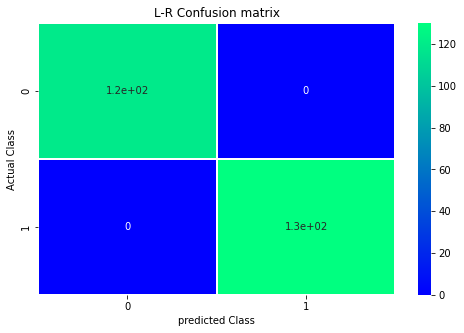

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap (cm1, linewidth=.01,
             annot=True,cmap="winter")
plt.title('L-R Confusion matrix')
plt.ylabel('Actual Class')
plt.xlabel('predicted Class')

# show all the evaluation metrics
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
# print(round(accuracy_score(svm_pred,y_test)*100,2))
print('Testing Accuracy for Logistic Regression Machine:',
      (TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity/Recall for L-R Machine:',
      (TP/(TP+FN)))
print('Testing Specificity for L-R Machine:',
      (TN/(TN+FP)))
print('Testing Precision for L-R Machine:',
      (TP/(TP+FP)))

# R-F Model Evaluation

In [ ]:
# for random forest classifier
cm2 = confusion_matrix(y_test, model2)
cm2

array([[119,   0],
       [  0, 130]], dtype=int64)

In [ ]:
# classification report
print('classification report:', classification_report(y_test, model2))

classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       130

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



# R-F Model Performance

Testing Accuracy for Logistic Regression Machine: 1.0
Testing Sensitivity/Recall for R-F Machine: 1.0
Testing Specificity for R-F Machine: nan
Testing Precision for R-F Machine: 1.0


C:\Users\user\AppData\Local\Temp/ipykernel_13208/1318644869.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  (TN/(TN+FP)))


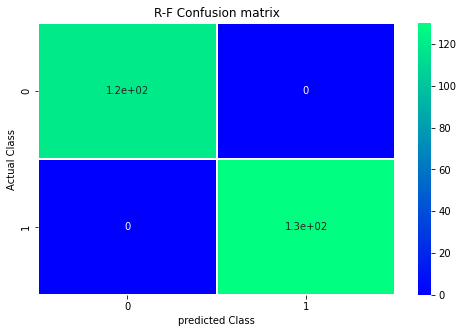

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap (cm2, linewidth=.01,
             annot=True,cmap="winter")
plt.title('R-F Confusion matrix')
plt.ylabel('Actual Class')
plt.xlabel('predicted Class')

# show all the evaluation metrics
TP=cm2[0][0]
TN=cm2[1][0]
FP=cm2[0][1]
# print(round(accuracy_score(svm_pred,y_test)*100,2))
print('Testing Accuracy for Logistic Regression Machine:',
      (TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity/Recall for R-F Machine:',
      (TP/(TP+FN)))
print('Testing Specificity for R-F Machine:',
      (TN/(TN+FP)))
print('Testing Precision for R-F Machine:',
      (TP/(TP+FP)))



# Decision Tree Model Evaluation

In [ ]:
# confusion table
cm3 = confusion_matrix(y_test, model3)
cm3

array([[119,   0],
       [  0, 130]], dtype=int64)

In [ ]:
#  classification report
print('classification report:', classification_report(y_test, model3))

classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       130

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



Testing Accuracy for D-T Machine: 1.0
Testing sensitivity/recall for D-T Machine: 1.0
Testing Specificity for D-T Machine: 1.0
Testing Precision for D-T Machine: 1.0


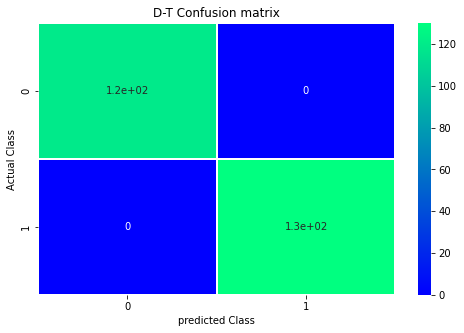

In [ ]:
# performance evaluation
plt.figure(figsize=(8, 5))
sns.heatmap (cm3, linewidth=.01,
             annot=True,cmap="winter")
plt.title('D-T Confusion matrix')
plt.ylabel('Actual Class')
plt.xlabel('predicted Class')
# rf_pred= confusion_matrix(y_test, clr)
TP= cm3[0][0]
TN= cm3[1][1]
FN= cm3[1][0]
FP= cm3[0][1]
# print(round(confusion_matrix(rf_pred, y_test)*100,2))
print('Testing Accuracy for D-T Machine:',
      (TP+TN)/(TP+TN+FN+FP))
print('Testing sensitivity/recall for D-T Machine:',
      (TP/(TP+FN)))
print('Testing Specificity for D-T Machine:',
      (TN/(TN+FP)))
print('Testing Precision for D-T Machine:',
      (TP/(TP+FP)))


# SVM Model Evaluation

In [ ]:
# confusion matrix
cm4 = confusion_matrix(y_test, model4)
cm4

array([[ 74,  45],
       [ 29, 101]], dtype=int64)

In [ ]:
# classification report
print('classification report:', classification_report(y_test, model4))

classification report:               precision    recall  f1-score   support

         0.0       0.72      0.62      0.67       119
         1.0       0.69      0.78      0.73       130

    accuracy                           0.70       249
   macro avg       0.71      0.70      0.70       249
weighted avg       0.70      0.70      0.70       249



# SVM Model Performance

Testing Accuracy SVM Machine: 0.6959459459459459
Testing sensitivity/recall for SVM Machine: 1.0
Testing Specificity for SVM Machine: 0.3918918918918919
Testing Precision for SVM Machine: 0.6218487394957983


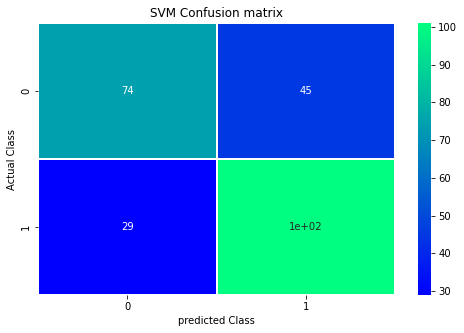

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap (cm4, linewidth=.01,
             annot=True,cmap="winter")
plt.title('SVM Confusion matrix')
plt.ylabel('Actual Class')
plt.xlabel('predicted Class')

# show all the evaluation metrics
TP=cm4[0][0]
TN=cm4[1][0]
FP=cm4[0][1]
# print(round(accuracy_score(svm_pred,y_test)*100,2))
print('Testing Accuracy SVM Machine:',
      (TP+TN)/(TP+TN+FN+FP))
print('Testing sensitivity/recall for SVM Machine:',
      (TP/(TP+FN)))
print('Testing Specificity for SVM Machine:',
      (TN/(TN+FP)))
print('Testing Precision for SVM Machine:',
      (TP/(TP+FP)))